In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

Halloween may be over but my favorite time of year is here - when candy is heavily discounted after Halloween! Let's look at a dataset that looks at how much people like different candies.

In [2]:
df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/candy-power-ranking/candy-data.csv')
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


Each row in the dataset is a different candy. There are several categorial variables marked as either 1 or 0 that lets us know whether a certain candy fits in that category (1 being yes and 0 being no). For example, 100 grand has chocolate in it while Air Heads do not.

1) How many candies are in this dataset?

In [3]:
df = df[df['chocolate'] | df['fruity'] | df['caramel'] | df['peanutyalmondy'] | df['nougat'] | df['crispedricewafer'] | df['hard'] | df['bar']  | df['pluribus']  == 1 ].reset_index(drop=True)

df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
3,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
4,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547


#### There are 83 candies

2) How many candies have chocolate in them? How many don't?

In [4]:
df_chocolate = df[df['chocolate'] == 1].reset_index(drop=True)
df_chocolate.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
3,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
4,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037


####  37 candies have chocolates and 46 dont have chocolate in them

3) Let's call the last column - the 'winpercent' column - equivalent to an approval rating for a given candy.

What is the mean 'approval rating' for candies with chocolate? What is the mean 'approval rating' for candies without chocolate? What is the difference in these mean approval ratings (with chocolate minus without chocolate)?

In [5]:
chocolate_winners = df[df['chocolate'] == 1]['winpercent']
non_chocolate_winners = df[df['chocolate'] == 0]['winpercent']

In [6]:
chocolate_winners.mean()

60.9215294054054

In [7]:
non_chocolate_winners.mean()

42.27066836956522

In [8]:
chocolate_winners.mean()-non_chocolate_winners.mean()

18.65086103584018

4) Say that we want to see if there is a *difference* in approval rating between candies with chocolates and candies without chocolates. In this case, what is our null hypothesis and our alternate hypothesis?

#### NH -  there is a no difference in approval rating between candies with chocolates and candies without chocolates
#### AH -  there is a difference in approval rating between candies with chocolates and candies without chocolates

5) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the chocolate approval ratings and non-chocolate approval ratings, shuffle them, and then break out new chocolate approval ratings and non-chocolate approval ratings, similar to what we did last week in class (**note that you can use the bootstrap_mean_diff function we covered this week in the class for running a bootstrap**). Record the mean difference between the chocolate approval ratings and non-chocolate approval ratings.

Plot a histogram of the 10,000 simulated differences recorded. What is the average simulated difference?

In [9]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((chocolate_winners, non_chocolate_winners), axis=None)
    np.random.shuffle(total)
    new_chocolate_winners = total[:len(chocolate_winners)]
    new_non_chocolate_winners = total[len( non_chocolate_winners):]
    diff.append(np.mean(new_chocolate_winners) - np.mean(new_non_chocolate_winners))

(array([  3.,   2.,   3.,   6.,   9.,   8.,  26.,  20.,  29.,  71.,  84.,
        103., 133., 174., 209., 288., 310., 310., 406., 438., 505., 533.,
        534., 540., 558., 591., 529., 528., 485., 450., 380., 350., 306.,
        251., 197., 175., 124.,  92.,  76.,  48.,  44.,  31.,  17.,  13.,
          2.,   2.,   2.,   2.,   2.,   1.]),
 array([-12.03663632, -11.5424466 , -11.04825687, -10.55406715,
        -10.05987742,  -9.5656877 ,  -9.07149797,  -8.57730825,
         -8.08311852,  -7.5889288 ,  -7.09473907,  -6.60054934,
         -6.10635962,  -5.61216989,  -5.11798017,  -4.62379044,
         -4.12960072,  -3.63541099,  -3.14122127,  -2.64703154,
         -2.15284182,  -1.65865209,  -1.16446237,  -0.67027264,
         -0.17608291,   0.31810681,   0.81229654,   1.30648626,
          1.80067599,   2.29486571,   2.78905544,   3.28324516,
          3.77743489,   4.27162461,   4.76581434,   5.26000406,
          5.75419379,   6.24838352,   6.74257324,   7.23676297,
          7.730952

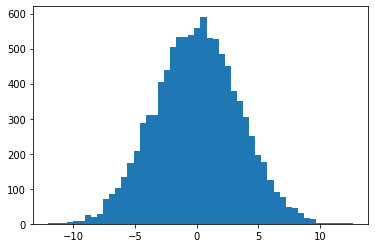

In [10]:
plt.hist(diff, bins=50)

In [11]:
np.mean(diff)

0.024989864716216295

6) Say you are running a two-tailed hypothesis test, where the null hypothesis is that there is no difference in the approval rating for chocolate candies and non-chocolate candies, and the alternate hypothesis is that there is a difference in the approval rating.

If the test is at the 0.05 significance level, what are the rejection regions?

Where do the results you found earlier fit into the distribution? What is the percentile value? What is the p-value (remember, two-tailed)?

Can we reject the null hypothesis?

In [12]:
print("Rejection region: less than ",np.percentile(diff,2.5))

Rejection region: less than  -6.67939553108108


In [13]:
print("Rejection region: greater than ",np.percentile(diff, 97.5))

Rejection region: greater than  6.677771925675677


#### We can reject the NH since the difference 18.65 is more than 6.6777.

In [14]:
stats.percentileofscore(diff, 18.65)

100.0

7) Now let's use what we've learned the past two weeks. Plot a scatter plot between the percentage of sugar for *all* candies and the approval rating for *all* candies. What does the relationship look like? Do you think we need to transform the response variable?

Text(0.5, 0.92, 'Sugar in Candies vs approval rating ')

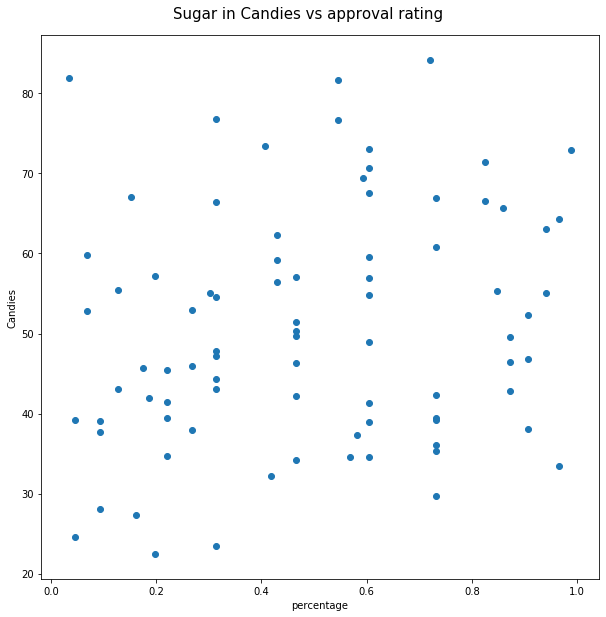

In [15]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['sugarpercent'], df['winpercent'])
plt.xlabel('percentage')
plt.ylabel('Candies')
fig.suptitle('Sugar in Candies vs approval rating ', fontsize=15, y=0.92)

#### Looks like there is no linear relationship between these two data sets.we have to transform the response variable.

8) What is the covariance between these two variables? What is the correlation? What does the correlation indicate about the strength of the relationship? Is the correlation statistically significant at a significance level of 0.05? (Note you do NOT have to calculate this, it is in the correlation output via stats.pearsonr)

In [16]:
#Covariance
np.cov(df['sugarpercent'], df['winpercent'], bias=True)

array([[7.55300270e-02, 8.36541086e-01],
       [8.36541086e-01, 2.14908638e+02]])

In [17]:
#Covariance Divided by Variance = Correlation
np.cov(df['sugarpercent'], df['winpercent'], bias=True)[0][1] / (np.std(df['sugarpercent']) * np.std( df['winpercent']))

0.20763497996748548

#### close to weak positive correlation

In [18]:
#Correlation & P-Value
stats.pearsonr(df['sugarpercent'], df['winpercent'])

(0.20763497996748553, 0.05962726108710393)

#### the correlation statistically is not significant at a significance level of 0.05

9) Using the 'evaluate linear relationship' package we found in class this week, find the slope, intercept, prediction and residuals for this relationship (with 'sugarpercent' being the X variable or independent variable and 'winpercent' being the Y variable or dependent variable. Re-plot the scatterplot with the predictive slope on top of it like we did in class.

In [19]:
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(df['sugarpercent'], df['winpercent'])

In [20]:
slope

11.075609517020636

In [21]:
intercept

45.15879313424966

Text(0.5, 0.92, 'Sugar in Candies vs approval rating')

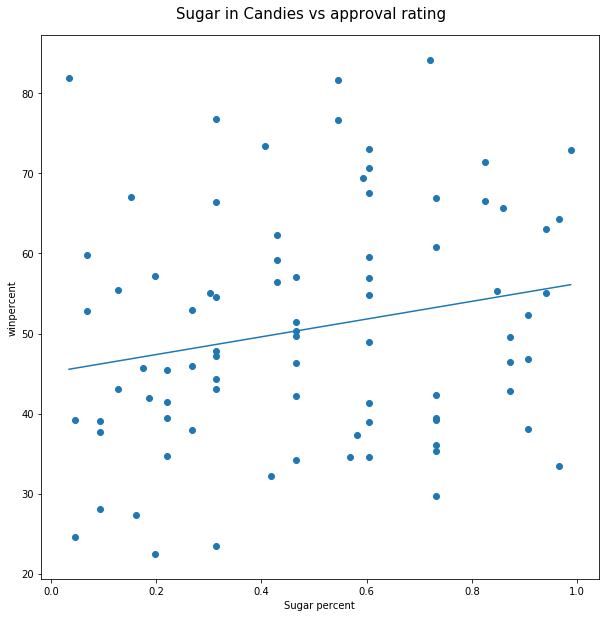

In [22]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['sugarpercent'], df['winpercent'])
sorted_order = np.argsort(df['sugarpercent'])
plt.plot(df['sugarpercent'][sorted_order], predictions[sorted_order])
plt.xlabel('Sugar percent')
plt.ylabel('winpercent')
fig.suptitle('Sugar in Candies vs approval rating', fontsize=15, y=0.92)

10) Now plot the residuals for the model like we did in class.

Text(0.5, 0.92, 'Residuals')

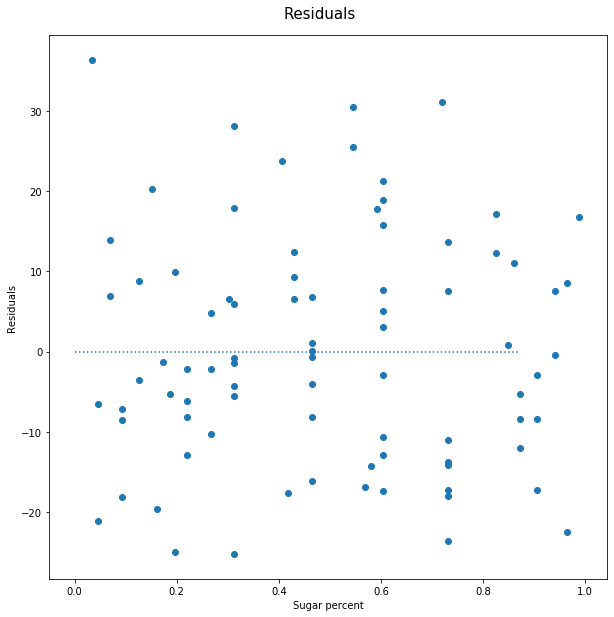

In [23]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['sugarpercent'], residuals)
plt.plot([0, df['sugarpercent'][len(df) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Sugar percent')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

11) What is the R-squared value of the relationship between these two variables? What does this say when considered with the correlation of the two variables? (Consider what this plot looks like versus like the plots we went over in class)

In [24]:
print('R-Squared Value:', np.round(np.power(stats.pearsonr(df['sugarpercent'], df['winpercent'])[0], 2), 4))

R-Squared Value: 0.0431


#### The variance of the predictions is 4.31% of the variance of the sugarpercent, meaning that 4.31% of the variance in the predictions is "explained' in the formula.

BONUS: 12) Say we wanted to run the earlier hypothesis test (approval rating of chocolates vs. non-chocolates) with a two-sample T-test rather than a bootstrap test. 

Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [25]:
#Difference in Means
np.mean(chocolate_winners ) - np.mean(non_chocolate_winners )

18.65086103584018

In [26]:
#Get Pooled Variance
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))
pooled_var = custom_pooled_variance(chocolate_winners,non_chocolate_winners)
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 6.44
Pooled Standard Deviation: 2.54


In [27]:
#Get Degrees of Freedom
df = len(chocolate_winners) + len(non_chocolate_winners) - 2
print(df)

81


BONUS: 13) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution? Make a plot highlighting these rejection region (s?) in red.

In [28]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=81)

Rejection Region: Less than -5.05
Rejection Region: Less than 5.05


Text(0.5, 0.92, 'T-Distribution of approval rating of chocolates vs. non-chocolates')

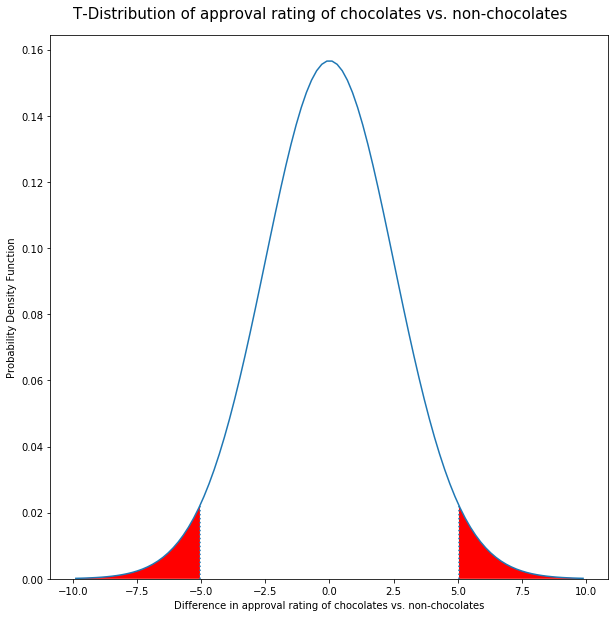

In [29]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=81)
print('Rejection Region: Less than', np.round(dist.ppf(0.025), 2))
print('Rejection Region: Less than', np.round(dist.ppf(0.975), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in approval rating of chocolates vs. non-chocolates')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of approval rating of chocolates vs. non-chocolates', fontsize=15, y=0.92)

BONUS: 14) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

#### Yes we can reject the null hypothesis since our mean diff is greater than 5.05

In [30]:
#P-Value
1-(stats.t(loc=0, scale=np.sqrt(pooled_var), df=81).cdf(18.65086103584018))

7.161238269048908e-11